In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [78]:
df= pd.read_csv('sim_results_5_4_3_3_3_1_1_5_5_3_3_3_1_1_cardata.txt', names =['tiempo']+[f'par{i}' for i in range(20)],sep = ' ', index_col=False)
#df= pd.read_csv('sim_results_1_0_3_3_3_5_5_1_1_3_3_3_5_5_cardata.txt', names =['tiempo']+[f'par{i}' for i in range(20)],sep = ' ', index_col=False)

In [79]:
df['tiempo'].max()

np.int64(10799)

In [80]:
# looking for zig zag
for id,test in df.groupby('par13'):
    test['change']=np.abs(test['par1']-test['par1'].shift()).rolling(10).sum()
    if test['change'].max()>1:
        print(f'carro {id} está zigzagueando en t {test[test['change']==test['change'].max()][['tiempo','par10']]}')
    

carro 432 está zigzagueando en t         tiempo  par10
296182    6951     14
296240    6952     14
296298    6953     14
296356    6954     14
296413    6955     14
296470    6956     14
296527    6957     14
296584    6958     14
carro 451 está zigzagueando en t         tiempo  par10
330904    7609     14
330945    7610     14
330986    7611     14
331027    7612     14
carro 458 está zigzagueando en t         tiempo  par10
213416    5329     14
213459    5330     14
213503    5331     14
213547    5332     14
213591    5333     14
213635    5334     14
213679    5335     14
carro 460 está zigzagueando en t         tiempo  par10
390105    9557     14
390126    9558     14
390147    9559     14
390166    9560     14
390186    9561     14
390206    9562     14
carro 466 está zigzagueando en t         tiempo  par10
194394    4879      7
194443    4880      7
194492    4881      7
194541    4882      7
194590    4883      7
194639    4884      7
194688    4885      7
194737    4886      7

In [81]:
mask = (df['tiempo']>7670) & (df['par13']==470) & (df['par10']==14)
df[mask].head(50)

,tiempo,par0,par1,par2,par3,par4,par5,par6,par7,par8,...,par10,par11,par12,par13,par14,par15,par16,par17,par18,par19


In [83]:
import numpy as np
from vpython import*
scene = canvas() # This is needed in Jupyter notebook and lab to make programs easily rerunnable
   
Db = 27
Dy = 3
DS = 1000
Nw = 3
Ds = 30
Dw = 45
gap=(DS-(Nw-1)*Ds-Dw)/2.0
NStations = 46
Ocmax = 160

ycenter = 1100
scene.width = 800
scene.height = 200
scene.range = 55
scene.center = vector(ycenter,0,0)
scene.background = color.green
scene.ambient = color.gray(0.4)
scene.forward = vector(0,0.5,-1)
scene.up = vector(0,0,1)
scene.fov = 0.5
scene.lights[0].direction = vector(-10,10,10)



stationElements = []

# Algunos parámetros importantes
sL = 236 # the length of the station, in meters
dlN = 60 # extension of the double lane after the end of the station, to the north
dlS = 100 # extension of the double lane after the end of the station, to the south
dLB = 1000 # The space before the station, in meters
dLA = 300 # The space after the station, in meters
DLBN = -100 # The position where the double lane begins, respect to the station beginning in meters, to the north
DLBS = -60  # The position where the double lane begins, respect to the station beginning in meters, to the south
DLLN = 396 # the length of the double lane, to the north
DLLS = 346 # the length of the double lane, to the south
dS = 10 # the length of the entrance corridor, south
dN = 22 # the length of the entrance corridor, north

#Estación Calle 100
posx = 1100
posst=vector(posx,-11.5,-1)
stationElements.append(box(pos=posst, length=DS, width=1,height=4, color=color.gray(0.8) ))
posst=vector(posx,11.5,-1)
stationElements.append(box(pos=posst, length=DS, width=1,height=4, color=color.gray(0.8) ))

# separador oriental
finx = dLB + DLBN
orx = 0
posx = (finx+orx)/2
posst = vector(posx, -9.5, -1)
stationElements.append(box(pos=posst, length=finx-orx, width=1.5,height=0.8, color=color.black ))

# separador occiedental
finx = dLB + sL - DLBS - DLLS
orx = 0
posx = (finx+orx)/2
posst = vector(posx, 9.5, -1)
stationElements.append(box(pos=posst, length=finx-orx, width=1.5,height=0.8, color=color.black ))


# corredor norte
finx = dLB + DLBN + DLLN
orx = 0
posx = (finx+orx)/2
posst=vector(posx,-7.5,-1)
stationElements.append(box(pos=posst, length=finx-orx, width=1,height=4, color=color.gray(0.8) ))

# corredor al sur
orx = 0
finx = dLB + sL - DLBS
posx = (finx+orx)/2
posst=vector(posx,7.5,-1)
stationElements.append(box(pos=posst, length=finx-orx, width=1,height=4, color=color.gray(0.8) ))

# vagón 1
L1 = 48
posx = dS+dLB + L1/2
posv=vector(posx,0,0)
stationElements.append(box(pos=posv, length=L1, width=10,height=10, color=color.blue))

#vagon 2
L2 = 58
dL12 = 34
posx = dS+dLB + L1 + dL12 + L2/2
posv=vector(posx,0,0)
stationElements.append(box(pos=posv, length=L2, width=10,height=10, color=color.blue))


#vagón 3
L3 = 46
dL23 = 18
posx = dS+dLB + L1+ dL12 + L2 + dL23 + L3/2
posv=vector(posx,0,0)
stationElements.append(box(pos=posv, length=L3, width=10,height=10, color=color.blue))


#if j+1<Nw:
posv=vector(dLB+sL/2,0,0)
stationElements.append(box(pos=posv, length=sL, width=1,height=6, color=color.blue))
#if j==0:
#    posst=vector(x-0.5*Dw,-8,-1)
#    stationElements.append(box(pos=posst, length=Dw, width=1,height=10, color=color.gray(0.8)))
#    posst=vector(x-0.5*Dw,8,-1)
#    stationElements.append(box(pos=posst, length=Dw, width=1,height=10, color=color.gray(0.8)))

buses = []
time0 = 7200
for time in range(time0,time0+60*10):
    rate(5)
    
    for bus in buses:
        bus.visible = False
    del buses
        
    mask = df['tiempo']==time
    buses = []
    for index, bus in df[mask].iterrows():
        dire = bus['par17']
        if (dire == 0): # buses to the north
            x = bus['par0']
            y = bus['par1']
            lineid = bus['par10']
            DB = bus['par15']
            posbus = vector(x-0.5*DB,2*(2*y-5)-0.5*Dy,0)
            buses.append(box(pos=posbus, length=0.97*DB, height=Dy, width=4, color=vector(lineid/17,0.2,0.2)))
        else: # buses to the south
            x = 2*dLB+sL-(bus['par0']-1536)
            y = bus['par1']
            lineid = bus['par10']
            DB = bus['par15']
            posbus = vector(x+0.5*DB,-(2*(2*y-5)-0.5*Dy),0)
            buses.append(box(pos=posbus, length=0.97*DB, height=Dy, width=4, color=vector(lineid/17,0.2,0.2)))
    scene.capture('calle100_am_%d'%(time-time0))
    

<IPython.core.display.Javascript object>

In [49]:
df.groupby('tiempo')['par0'].count().sort_values()

tiempo
29       1
30       1
31       1
28       1
25       1
        ..
7254    44
7253    44
9898    44
9896    44
9897    44
Name: par0, Length: 10776, dtype: int64

# Cosas a corregir:
- Las rutas al sur hacen mucho zigzagging. El zigzagging se produce por la combinación de la posibilidad de pasar a la main lane si hay obstáculos, y la obligación de pasar a la stopping lane cuando el fin del carril es más importante.
- También hacia el sur se nota cómo muchos buses que van a parar en el vagón 6 pasan a la stopping lane muy temprano, incluso teniendo obstáculos. 
- Es posible que con la regla actual, los buses haciendo fila en la stopping lane pasen a la main lane para adelantarse en la fila. Un posible arreglo a esta situación es el requerimiento de que para pasar a la main lane, no debe haber más de 1 bus de la misma ruta en la stopping lane antes de llegar a la estación. 

In [25]:
df[df['tiempo']==5600]

,tiempo,par0,par1,par2,par3,par4,par5,par6,par7,par8,...,par10,par11,par12,par13,par14,par15,par16,par17,par18,par19
209105,5600,100,0,0,0,0,0,0,1132,0,...,2,0,0,497,5597,27,3,0,0,0
209106,5600,128,0,7,42,0,0,0,1207,0,...,0,0,0,499,5585,27,5,0,0,0
209107,5600,128,1,7,283,0,0,0,1000000,-1,...,15,0,0,488,5593,17,6,0,1,0
209108,5600,202,0,12,186,0,0,0,1132,0,...,3,0,0,438,5581,27,3,0,0,0
209109,5600,410,0,17,92,0,0,0,1000000,-1,...,17,0,0,487,5567,17,6,0,0,0
209110,5600,431,1,0,0,0,0,0,1000000,-1,...,15,0,0,437,5549,27,6,0,1,0
209111,5600,458,1,0,0,0,0,0,1059,0,...,5,0,0,453,5544,27,1,0,1,0
209112,5600,485,1,0,0,0,0,0,1059,0,...,6,0,0,446,5528,27,1,0,1,0
209113,5600,512,1,0,0,0,0,0,1000000,-1,...,15,0,0,491,5520,27,6,0,1,0
209114,5600,529,0,17,209,0,0,0,1000000,-1,...,17,0,0,449,5566,27,6,0,0,0


In [34]:
df[(df['par13']==481) & (df['tiempo']>5600)].head(20)

,tiempo,par0,par1,par2,par3,par4,par5,par6,par7,par8,...,par10,par11,par12,par13,par14,par15,par16,par17,par18,par19
167229,6327,100,0,0,0,0,0,0,1000000,-1,...,17,0,0,481,6327,27,6,0,0,0
167271,6328,101,0,1,34,0,0,0,1000000,-1,...,17,0,0,481,6327,27,6,0,0,0
167312,6329,103,0,2,43,0,0,0,1000000,-1,...,17,0,0,481,6327,27,6,0,0,0
167353,6330,106,0,3,52,0,0,0,1000000,-1,...,17,0,0,481,6327,27,6,0,0,0
167394,6331,110,0,4,61,0,0,0,1000000,-1,...,17,0,0,481,6327,27,6,0,0,0
167435,6332,115,0,5,70,0,0,0,1000000,-1,...,17,0,0,481,6327,27,6,0,0,0
167476,6333,121,0,6,79,0,0,0,1000000,-1,...,17,0,0,481,6327,27,6,0,0,0
167517,6334,127,0,6,88,0,0,0,1000000,-1,...,17,0,0,481,6327,27,6,0,0,0
167558,6335,134,0,7,98,0,0,0,1000000,-1,...,17,0,0,481,6327,27,6,0,0,0
167598,6336,142,0,8,108,0,0,0,1000000,-1,...,17,0,0,481,6327,27,6,0,0,0


In [72]:
(1132-1097)<(2*27+2*6-27)

True

<Axes: xlabel='tiempo', ylabel='par0'>

U:\PyFiles\Envs\brtsim\Lib\site-packages\IPython\core\events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
U:\PyFiles\Envs\brtsim\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


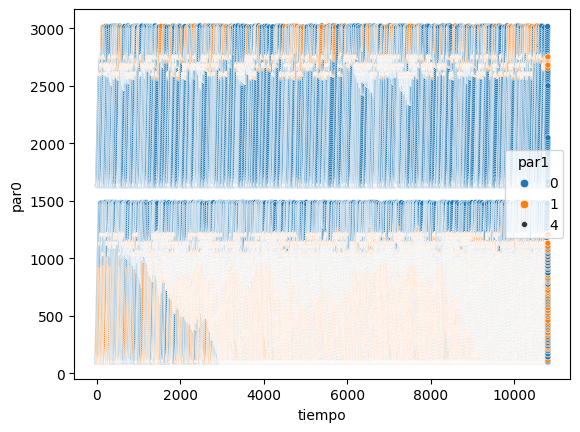

In [131]:
fig, ax = plt.subplots()
sns.scatterplot(df, x = 'tiempo', y = 'par0', hue = 'par1', ax = ax, size = 4)
#ax.set_xlim(2000,4000)

<Axes: xlabel='tiempo', ylabel='par0'>

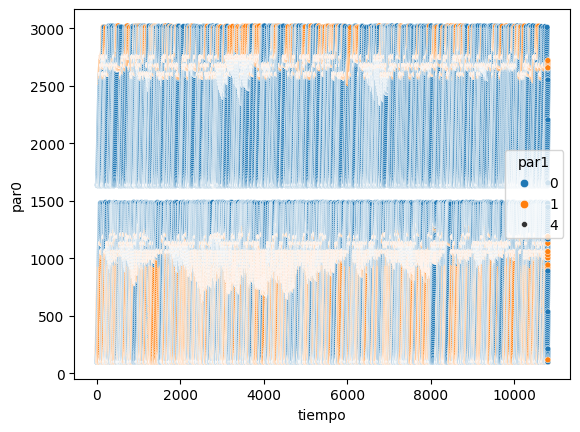

In [39]:
fig, ax = plt.subplots()
sns.scatterplot(df, x = 'tiempo', y = 'par0', hue = 'par1', ax = ax, size = 4)
#ax.set_xlim(2000,4000)

In [30]:
df[df['par10']==15]['par15']

0        27
1        27
2        27
3        27
5        27
         ..
46320    27
46321    27
46327    27
46329    27
46335    27
Name: par15, Length: 18231, dtype: int64